In [274]:
import numpy as np
import pandas as pd
import pyarrow
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows',500)

#Execute all the "Jupyter notebook Non prints"
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #'last' / 'last'

In [235]:
#Load the data
rated_bookings_file = './Datasets/rated_bookings_with_location.csv'
rb=pd.read_csv(rated_bookings_file)

#Convert to Datetimes
rb['pickup_date'] = pd.to_datetime(rb['pickup_date'])
rb['last_update_date'] = pd.to_datetime(rb['last_update_date'])
rb['booking_date'] = pd.to_datetime(rb['booking_date'])
rb['rating_date'] = pd.to_datetime(rb['rating_date'])

#Load the bookings
bookings_file = './Datasets/all_bookings3.0.csv'
book=pd.read_csv(bookings_file)

book['pickup_date'] = pd.to_datetime(book['pickup_date'])
book['last_update_date'] = pd.to_datetime(book['last_update_date'])
book['booking_date'] = pd.to_datetime(book['booking_date'])



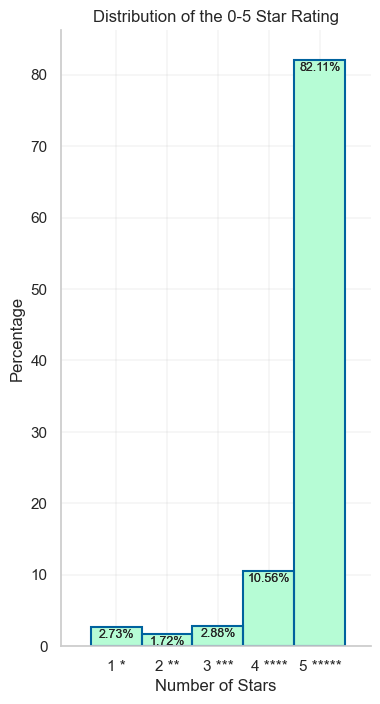

In [236]:
#Taking a general view about our reviews

width = 4
height = 8
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')


ax=sns.histplot(rb, x='rating_score', stat='percent', discrete=True, alpha=1, color='#b6fcd5')
ax=sns.histplot(rb, x='rating_score', stat='percent', discrete=True, alpha=1, fill=False, color='#00629e')
ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%',fontsize=9, padding=-10)
ax.set_xticks([1,2,3,4,5], labels=['1 *','2 **','3 ***','4 ****','5 *****'])

plt.title('Distribution of the 0-5 Star Rating')

#ax.set_xticks(range(len(df)), labels=range(2011, 2019))
ax.set(xlabel='Number of Stars', ylabel='Percentage')
plt.setp(ax.patches, linewidth=1.5 )

ax.set_ylim(ymin=0.)
ax.set_xlim(xmin=-0.08,xmax=6)
sns.despine(top=True)


plt.show()

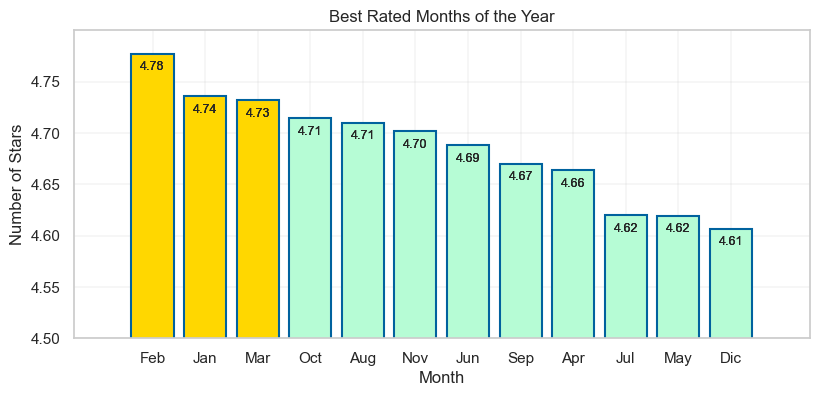

In [237]:
#Best Rated months 

#DATA
group = rb.groupby(rb['pickup_date'].dt.month)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
#g1

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)

ax.set_xticks(g1['pickup_date']-1, labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic'])#<-- This is improveable :( but for some reason it is not working intuitively.
ax.set_ylim(ymin=4.5 ,ymax=4.80)
ax.set(yticks=np.arange(4.5, 4.8, .05))
ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Best Rated Months of the Year')

ax.set(xlabel='Month', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


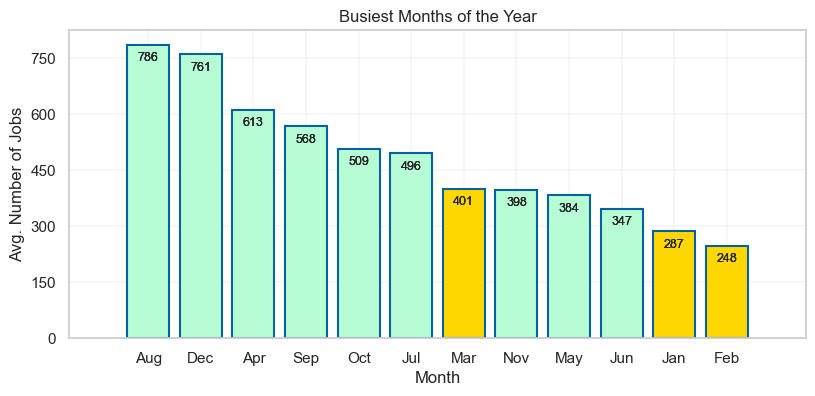

In [238]:
#What about the volume of work? What is the busiest month?

#DATA
group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g1=group.agg({'booking_id':['count']})
g1.index.rename(['year','month'], inplace=True) #Gold Nugget!!
g1.columns=['count']
g1.reset_index(inplace=True)
g1=g1.groupby('month')
g2=g1.agg({'count':['mean']})
g2.columns=['mean']
g2.sort_values(by='mean', ascending=False, inplace=True)
g2.reset_index(inplace=True)


#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')
filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#FFD700','#FFD700']

ax=sns.barplot(data=g2, x='month',y='mean',  fill=True, order=g2['month'])
ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g2['mean'],color=filledcolors)
ax=sns.barplot(data=g2, x='month',y='mean',  fill=False, order=g2['month'], color='#00629e')

#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)
ax.grid(linewidth=0.25)

months=['Aug','Dec','Apr','Sep','Oct','Jul','Mar','Nov','May','Jun','Jan','Feb'] #<-- This is improvable :( but for some reason it is not working intuitively.
ax.set_xticks(range(0,12), labels=months)
#ax.set_ylim(ymin=4.5 ,ymax=4.80)
ax.set(yticks=np.arange(0, 850, 150))
ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('Busiest Months of the Year')

ax.set(xlabel='Month', ylabel='Avg. Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()
#g2

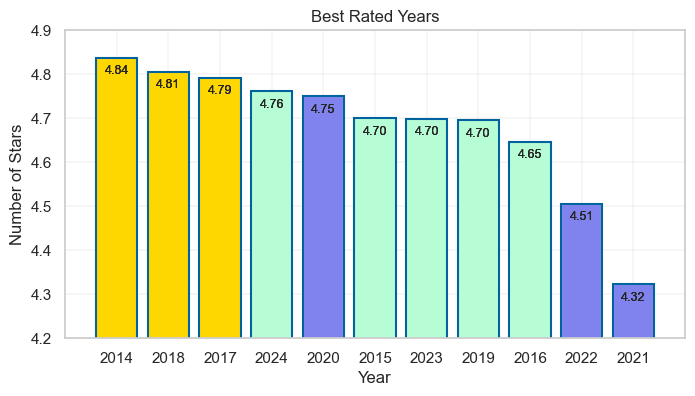

In [239]:
#Ranking of best Rated Year

#DATA
group = rb.groupby(rb['pickup_date'].dt.year)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['mean'], ascending=False)
g1

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#8083ee','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#8083ee']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)

ax.set_ylim(ymin=4.2 ,ymax=4.9)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Best Rated Years')

ax.set(xlabel='Year', ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


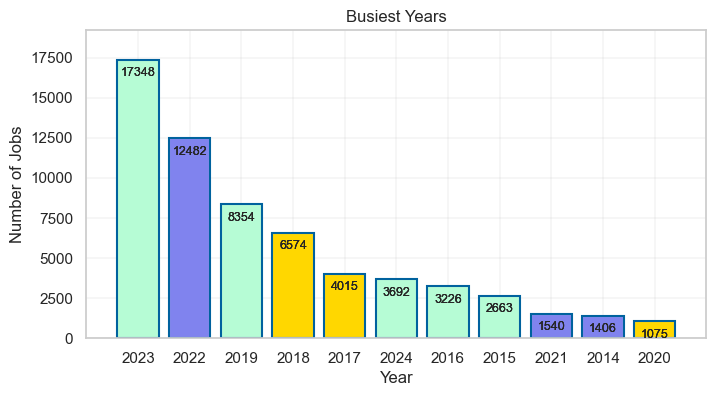

In [240]:
#Busiest Years

#DATA
group = book[book['pickup_date'].dt.year<2025].groupby(book['pickup_date'].dt.year)
g1=group.agg({'booking_id':['count']})
g1.columns=['count']
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#8083ee','#b6fcd5','#FFD700','#FFD700', '#b6fcd5','#b6fcd5','#b6fcd5','#8083ee','#8083ee','#FFD700']
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6,7,8,9,10],g1['count'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='count',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.0f', padding=-14, fontsize=9)

ax.set_ylim(ymin=0 ,ymax=19200)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Busiest Years')

ax.set(xlabel='Year', ylabel='Number of Jobs')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


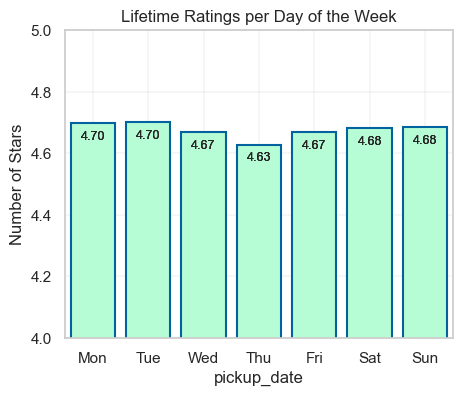

In [241]:
#What about the days? What is the highest rated day of the week?
#Worth checking the volume?
#Ranking of best Rated Year

#DATA
group = rb.groupby(rb['pickup_date'].dt.weekday)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
    
ax.set_xticks(g1['pickup_date'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Lifetime Ratings per Day of the Week')

ax.set(ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()



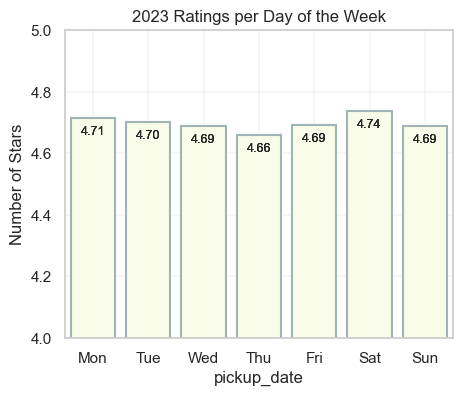

In [242]:
#Filtering for the Steady big years
#What about the days? What is the highest rated day of the week?
#Worth checking the volume?
#Ranking of best Rated Year

#DATA
group = rb[rb['pickup_date'].dt.year.isin([2023])].groupby(rb['pickup_date'].dt.weekday)
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['pickup_date'], ascending=True)
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#f8fce8','#f8fce8','#f8fce8','#f8fce8','#f8fce8','#f8fce8','#f8fce8']
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=True, order=g1['pickup_date'])

ax.bar([0,1,2,3,4,5,6],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='pickup_date',y='mean',  fill=False, order=g1['pickup_date'], color='#a0b4b8')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-14, fontsize=9)
    
ax.set_xticks(g1['pickup_date'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('2023 Ratings per Day of the Week')

ax.set(ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()



In [243]:
def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb.groupby(rb['weekend'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

,weekend,count,mean,sum,min,max,std
0,Weekend,6461,4.682247,30252,1,5,0.832640
1,Workday,13607,4.672962,63585,1,5,0.845333


      rating_score
mean      4.675952


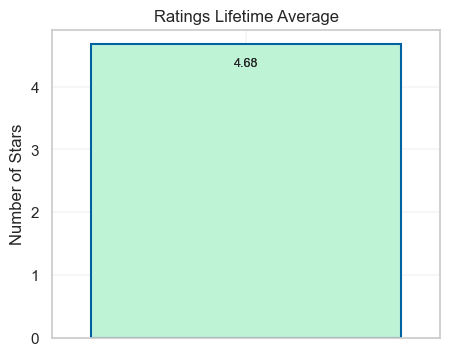

In [244]:
def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb
g1=group.agg({'rating_score':['mean']})
print(g1)
#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5']


ax=sns.barplot(data=g1,y='rating_score',  fill=True, color='#b6fcd5')
ax=sns.barplot(data=g1,y='rating_score',  fill=False, color='#00629e')


ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-18, fontsize=9)
    
#ax.set_xticks(g1['weekend'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings Lifetime Average')

ax.set(xlabel="", ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


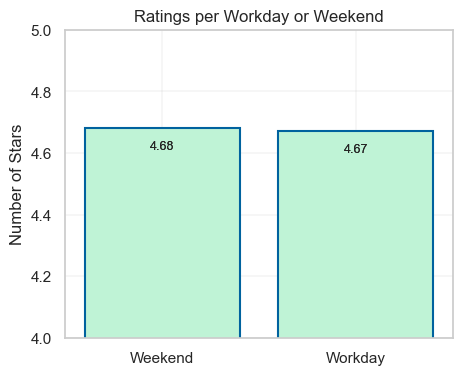

In [245]:
#WorkDay or Weekend?
#Worth checking the volume?
#Ranking of best Rated Year

def weekend(num):
    if int(num) <5:
        return 'Workday'
    else:
        return 'Weekend'
    
#DATA
rb_weekend=rb
rb_weekend['weekend']=rb['pickup_date'].apply(lambda x: weekend(x.dayofweek))

group = rb.groupby(rb['weekend'])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5']


ax=sns.barplot(data=g1, x='weekend',y='mean',  fill=True, order=g1['weekend'], color='#b6fcd5')
ax=sns.barplot(data=g1, x='weekend',y='mean',  fill=False, order=g1['weekend'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-18, fontsize=9)
    
#ax.set_xticks(g1['weekend'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings per Workday or Weekend')

ax.set(xlabel="", ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


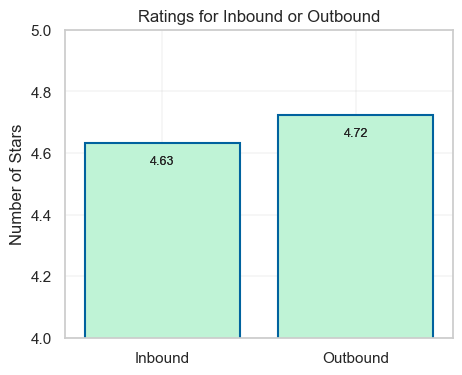

In [246]:
#Inbound or Outbound?
#Worth checking the volume?
#Ranking of best Rated Year

   
#DATA
group = rb.groupby(rb['in_or_outbound'])
g1=group.agg({'rating_score':['mean']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1

#VISUALIZATION
width = 5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

filledcolors=['#b6fcd5','#b6fcd5']


ax=sns.barplot(data=g1, x='in_or_outbound',y='mean',  fill=True, order=g1['in_or_outbound'], color='#b6fcd5')
ax=sns.barplot(data=g1, x='in_or_outbound',y='mean',  fill=False, order=g1['in_or_outbound'], color='#00629e')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f', padding=-18, fontsize=9)
    
#ax.set_xticks(g1['weekend'], labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.set_ylim(ymin=4 ,ymax=5)
#ax.set(yticks=np.arange(4.5, 4.85, .05))
#ax.set_xlim(xmin=-1,xmax=11.0)

plt.title('Ratings for Inbound or Outbound')

ax.set(xlabel="", ylabel='Number of Stars')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


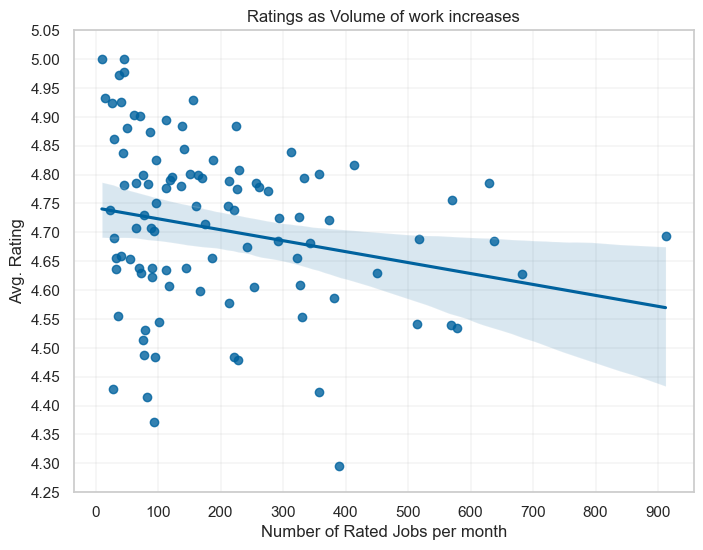

In [255]:
#REGPLOT
#Correlation Volume Year vs Rating
group = rb.groupby(rb['pickup_date'].dt.to_period('M'))
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
g1=g1.reset_index()
g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]

#VISUALIZATION
width = 8
height = 6
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')


ax=sns.regplot(data=g1,x='count',y='mean', fit_reg=True, color='#00629e')

ax.grid(linewidth=0.25)
    
ax.set_ylim(ymin=4.25 ,ymax=5)

ax.set(yticks=np.arange(4.25, 5.1, .05))
ax.set(xticks=np.arange(0, 1000, 100))


plt.title('Ratings as Volume of work increases')

ax.set(xlabel="Number of Rated Jobs per month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
plt.show()


<Axes: xlabel='count', ylabel='mean'>

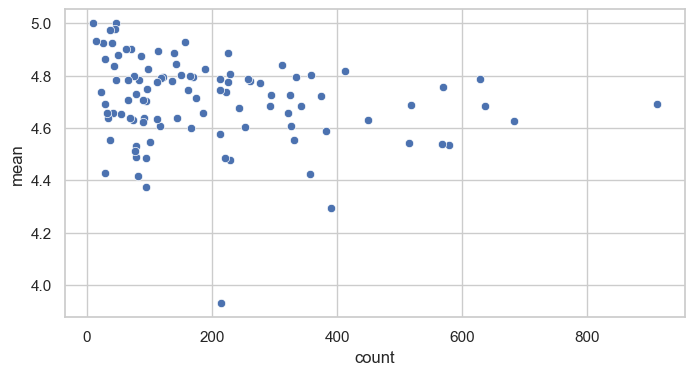

In [256]:
#Correlation Volume month vs Avg Rating in the Ratings Dataset
#No Hue. Keep it as well.
#DATA
group = rb.groupby(rb['pickup_date'].dt.to_period('M'))
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1

#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean')


'\nConclusion\nWhat I see here is that the Average Rating is 4.7 and the bigger the count\nis for a month, the stronger it is agains variations.\nBecause the ratings are discrete and go from 1 to 5. Being the average close to 4.7,\neverything that is not a 5 (closest value) is a big deviation, these deviations happen, \nhowever if it is a bigger work month they migth get compensated better.\nVehicles like Sedan and SUV6 have big volume to prove this.\n'

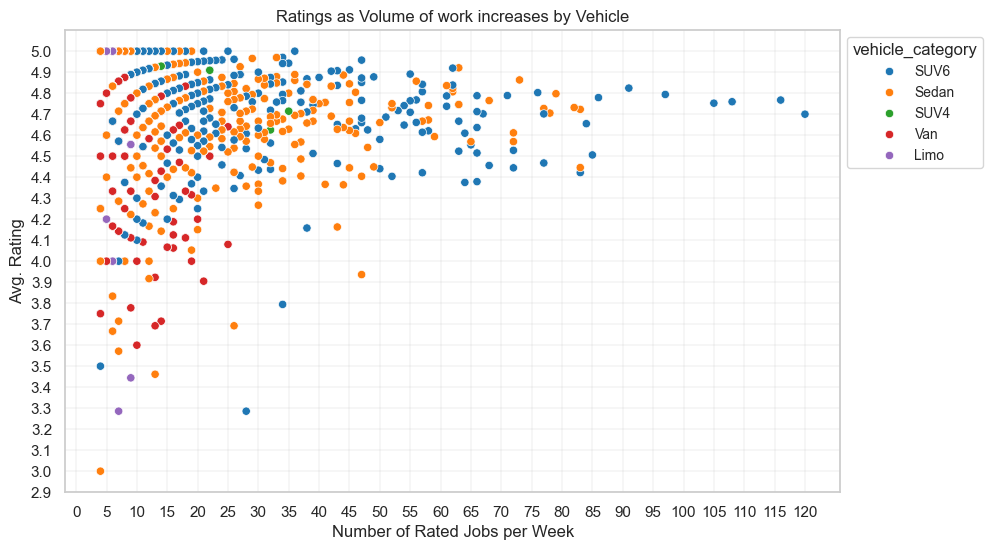

In [257]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('W'),rb['vehicle_category']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=4]
g1


#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='count',y='mean', hue='vehicle_category', alpha=1,palette=sns.color_palette("tab10", n_colors=5))
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4.25 ,ymax=5.1)
ax.set(yticks=np.arange(2.9, 5.1, .1))
ax.set(xticks=np.arange(0, 125, 5))
plt.title('Ratings as Volume of work increases by Vehicle')
ax.set(xlabel="Number of Rated Jobs per Week", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)



'''
Conclusion
What I see here is that the Average Rating is 4.7 and the bigger the count
is for a month, the stronger it is agains variations.
Because the ratings are discrete and go from 1 to 5. Being the average close to 4.7,
everything that is not a 5 (closest value) is a big deviation, these deviations happen, 
however if it is a bigger work month they migth get compensated better.
Vehicles like Sedan and SUV6 have big volume to prove this.
'''

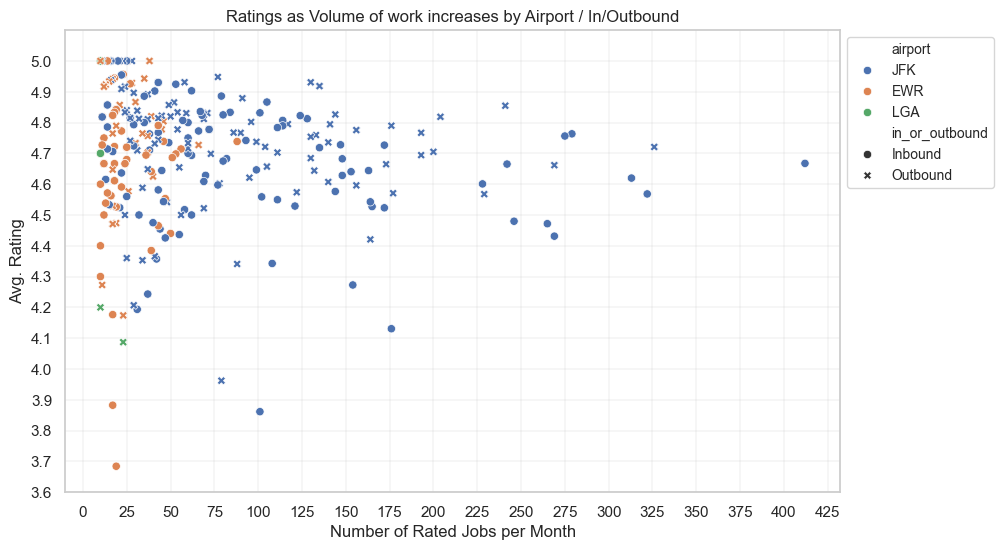

In [266]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('M'),rb['airport'],rb['in_or_outbound']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')



#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='count',y='mean', hue='airport', style='in_or_outbound')
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4.25 ,ymax=5.1)
ax.set(yticks=np.arange(3.6, 5.1, .1))
ax.set(xticks=np.arange(0, 450, 25))
plt.title('Ratings as Volume of work increases by Airport / In/Outbound')
ax.set(xlabel="Number of Rated Jobs per Month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

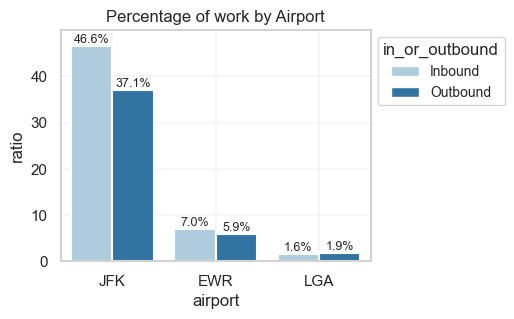

In [259]:
group = book.groupby(['airport','in_or_outbound'])
g1=group.agg({'booking_id':['count']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
total=g1['count'].sum()
g1['ratio']=(g1['count']/total)*100
g1

width = 4
height = 3
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.barplot(g1,x='airport', y='ratio', errorbar=None, hue='in_or_outbound', palette='Paired')
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.1f%%', padding=0, fontsize=9)
plt.title('Percentage of work by Airport')

ax.grid(linewidth=0.25)
ax.set_ylim(ymin=0 ,ymax=50)
ax.set(yticks=np.arange(0, 50, 10))
#ax.set(xticks=np.arange(0, 450, 25))

plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/1951746524.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(g1,x='vehicle_category', y='ratio', errorbar=None, palette='Dark2')


[None, None, None, None, None]

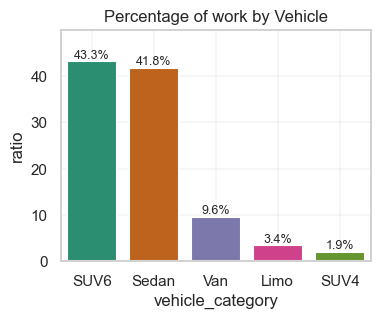

In [260]:
group = book.groupby(['vehicle_category'])
g1=group.agg({'booking_id':['count']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
total=g1['count'].sum()
g1['ratio']=(g1['count']/total)*100
g1

width = 4
height = 3
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.barplot(g1,x='vehicle_category', y='ratio', errorbar=None, palette='Dark2')
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.1f%%', padding=0, fontsize=9)
plt.title('Percentage of work by Vehicle')

ax.grid(linewidth=0.25)
ax.set_ylim(ymin=0 ,ymax=50)
ax.set(yticks=np.arange(0, 50, 10))
#ax.set(xticks=np.arange(0, 450, 25))

plt.setp(ax.patches, linewidth=1.5 )
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)


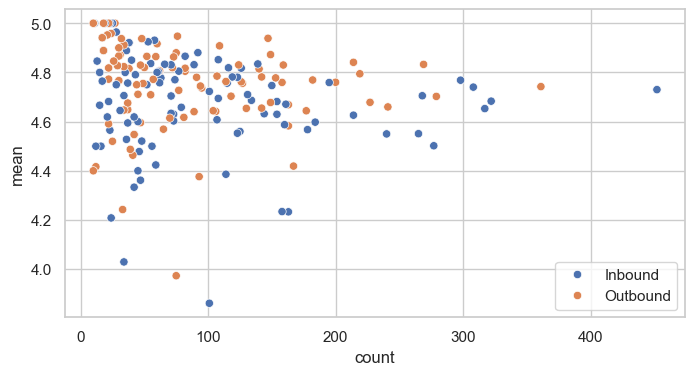

In [261]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb[rb['vehicle_category'].isin(['Sedan','SUV4','SUV6'])].groupby([rb['pickup_date'].dt.to_period('M'),rb['in_or_outbound']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1
#VISUALIZATION
width = 8
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

sns.scatterplot(data=g1, x='count',y='mean', hue='in_or_outbound')
plt.legend(loc='lower right')


,month,year,count,mean,sum,min,max,std
102,2023-08,2023,813,4.735547,3850,1,5,0.726133
98,2023-04,2023,596,4.676174,2787,1,5,0.824521
103,2023-09,2023,577,4.783362,2760,1,5,0.661333
106,2023-12,2023,536,4.746269,2544,1,5,0.720193
101,2023-07,2023,517,4.779497,2471,1,5,0.700031
90,2022-08,2022,504,4.581349,2309,1,5,0.876765
59,2019-08,2019,483,4.600414,2222,1,5,0.913113
104,2023-10,2023,468,4.728632,2213,1,5,0.755474
94,2022-12,2022,442,4.588235,2028,1,5,0.912323
63,2019-12,2019,378,4.645503,1756,1,5,0.821620


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/3260753890.py:19: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  ax=sns.scatterplot(data=g1, x='count',y='mean', hue='year',palette=sns.color_palette("tab10", n_colors=12),s=85)


(4.25, 5.1)

[[<matplotlib.axis.YTick at 0x130b2b550>,

[[<matplotlib.axis.XTick at 0x130a47890>,

Text(0.5, 1.0, 'Ratings as Volume of work increases by Year Excluding Vans and Limos')

[Text(0.5, 0, 'Number of Rated Jobs per Month'), Text(0, 0.5, 'Avg. Rating')]

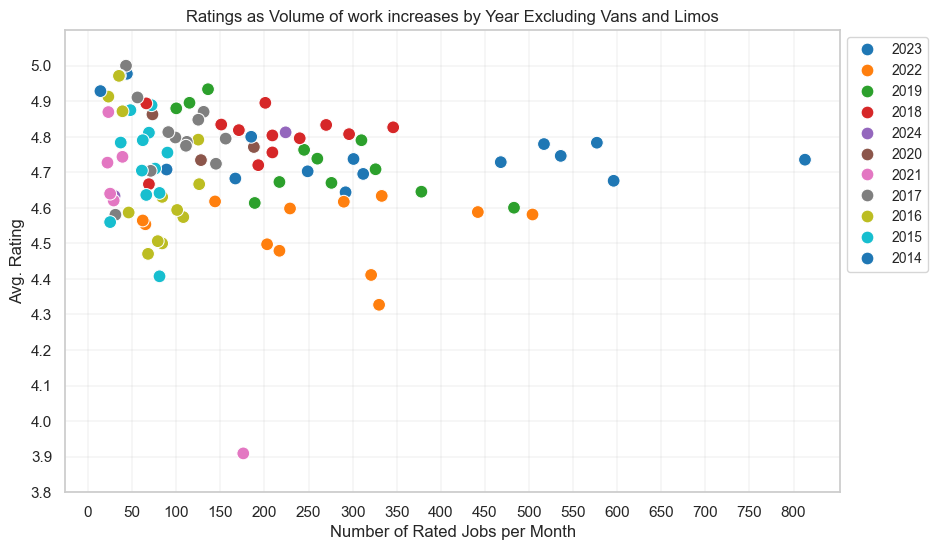

In [294]:
#Correlation Volume Year vs Rating in the Ratings Dataset
#DATA
group = rb[rb['vehicle_category'].isin(['Sedan','SUV4','SUV6'])].groupby([rb['pickup_date'].dt.to_period('M'),rb['pickup_date'].dt.to_period('Y')])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['month','year'], inplace=True)
g1=g1.reset_index()
g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
g1=g1[g1['count']>=10]
g1

#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='count',y='mean', hue='year',palette=sns.color_palette("tab10", n_colors=12),s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4.25 ,ymax=5.1)
ax.set(yticks=np.arange(3.80, 5.1, .1))
ax.set(xticks=np.arange(0, 850, 50))
plt.title('Ratings as Volume of work increases by Year Excluding Vans and Limos')
ax.set(xlabel="Number of Rated Jobs per Month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)

#plt.legend(loc='lower right')


/usr/local/lib/python3.11/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


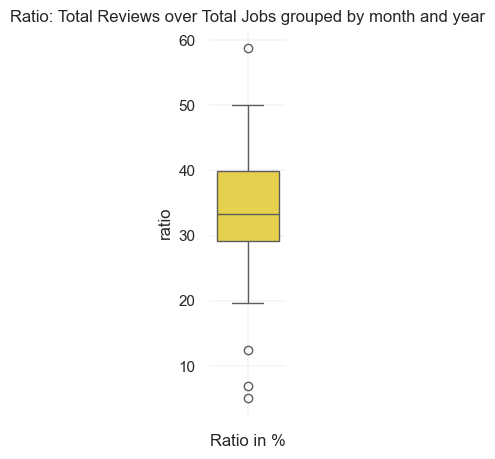

In [263]:
group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
g3


#VISUALIZATION
width = 1
height = 5
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=box_plot=sns.boxplot(g3,y='ratio', orient='h', color='#ffe234')
ax.grid(linewidth=0.25)
ax.set(xlabel="Ratio in %")
plt.title('Ratio: Total Reviews over Total Jobs grouped by month and year')
sns.despine(left=True, bottom=True)





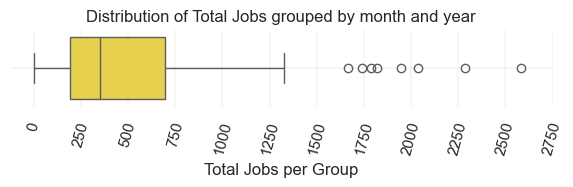

In [264]:
group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
g3


#VISUALIZATION
width = 7
height = 1
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=box_plot=sns.boxplot(g3,x='count_y',color='#ffe234')
ax.grid(linewidth=0.25)
ax.set(xlabel="Total Jobs per Group")
plt.title('Distribution of Total Jobs grouped by month and year')
ax.set(xticks=np.arange(0, 3000, 250))
plt.xticks(rotation=75)
sns.despine(left=True, bottom=True)





(array([   0,  250,  500,  750, 1000, 1250, 1500, 1750, 2000, 2250, 2500,
        2750]),
 [Text(0, 0, '0'),
  Text(250, 0, '250'),
  Text(500, 0, '500'),
  Text(750, 0, '750'),
  Text(1000, 0, '1000'),
  Text(1250, 0, '1250'),
  Text(1500, 0, '1500'),
  Text(1750, 0, '1750'),
  Text(2000, 0, '2000'),
  Text(2250, 0, '2250'),
  Text(2500, 0, '2500'),
  Text(2750, 0, '2750')])

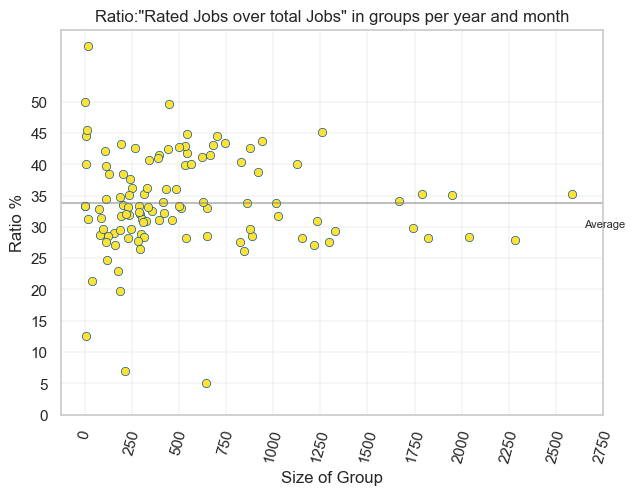

In [265]:
group = rb.groupby([rb['pickup_date'].dt.year, rb['pickup_date'].dt.month])
g1=group.agg({'rating_score':['count']})
g1.index.rename(['year','month'],inplace=True)
g1.columns=g1.columns.droplevel(0)
g1=g1.reset_index()
g1=g1.sort_values(by=['year','month'], ascending=True)
#g1

group = book.groupby([book['pickup_date'].dt.year, book['pickup_date'].dt.month])
g2=group.agg({'booking_id':['count']})
g2.index.rename(['year','month'],inplace=True)
g2.columns=g2.columns.droplevel(0)
g2=g2.reset_index()
g2=g2.sort_values(by=['year','month'], ascending=True)
#g2

g3=pd.merge(g1,g2,how='left',left_on=['year','month'],right_on=['year','month'])
g3['ratio']=(g3['count_x']/g3['count_y'])*100
g3=g3.sort_values(by=['year','month'], ascending=True)
g3
avg=g3['ratio'].mean()


#VISUALIZATION
width = 7
height = 5
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g3, x='count_y', y='ratio', color='#ffe234', edgecolors='#004f98')
plt.axhline(y=avg, color='grey', alpha=0.5)
ax.text(2650,30, "Average", fontsize=8) 
ax.grid(linewidth=0.25)
ax.set(xlabel="Size of Group")
ax.set(ylabel="Ratio %")
plt.title('Ratio:\"Rated Jobs over total Jobs\" in groups per year and month')
ax.set(xticks=np.arange(0, 3000, 250))
ax.set(yticks=np.arange(0, 51, 5))
plt.xticks(rotation=75)

,count,percent_days_in_advance
day_in_advance_groups,,
G01_12 hour,386,0.618798
G02_24 hour,2618,4.196925
G03_48 hour,3982,6.383559
G04_4 day,4504,7.220379
G05_1 week,5513,8.837910
G06_2 week,12193,19.546642
G07_1 month,13856,22.212604
G08_2 month,8992,14.415108
G09_3 month,4026,6.454095


[Text(0, -16, '0.62%'),
 Text(0, -16, '4.20%'),
 Text(0, -16, '6.38%'),
 Text(0, -16, '7.22%'),
 Text(0, -16, '8.84%'),
 Text(0, -16, '19.55%'),
 Text(0, -16, '22.21%'),
 Text(0, -16, '14.42%'),
 Text(0, -16, '6.45%'),
 Text(0, -16, '6.68%'),
 Text(0, -16, '3.01%')]

[Text(0, -16, '0.62%'),
 Text(0, -16, '4.20%'),
 Text(0, -16, '6.38%'),
 Text(0, -16, '7.22%'),
 Text(0, -16, '8.84%'),
 Text(0, -16, '19.55%'),
 Text(0, -16, '22.21%'),
 Text(0, -16, '14.42%'),
 Text(0, -16, '6.45%'),
 Text(0, -16, '6.68%'),
 Text(0, -16, '3.01%')]

(-2.0, 5.0)

[[<matplotlib.axis.YTick at 0x130a61590>,

Text(0.5, 1.0, '% Days in advance Groups')

[Text(0.5, 0, 'Days in advance Groups'),
 Text(0, 0.5, 'Ratio % per Total bookings')]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G01_12 hour'),
  Text(1, 0, 'G02_24 hour'),
  Text(2, 0, 'G03_48 hour'),
  Text(3, 0, 'G04_4 day'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G06_2 week'),
  Text(6, 0, 'G07_1 month'),
  Text(7, 0, 'G08_2 month'),
  Text(8, 0, 'G09_3 month'),
  Text(9, 0, 'G10_6 month'),
  Text(10, 0, 'G11_> 6 month')])

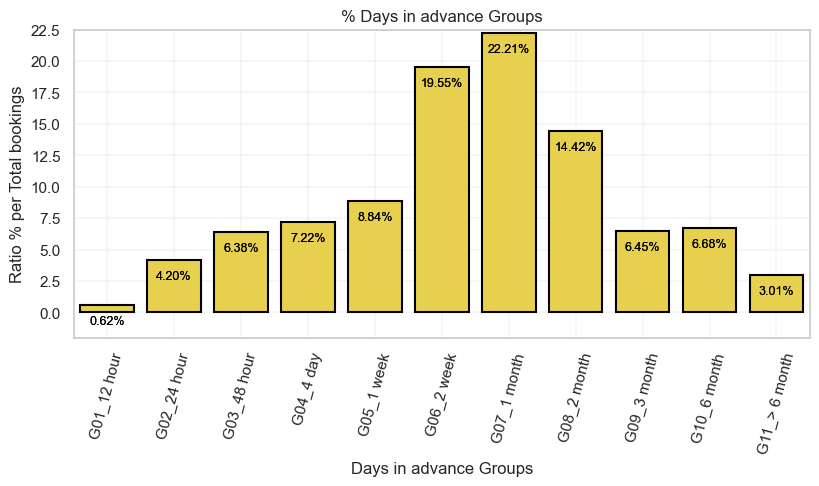

In [292]:
#DATA
group = book.groupby(book['day_in_advance_groups'])
g1=group.agg({'booking_id':['count']})
g1.columns=['count']


g1['percent_days_in_advance']=(g1['count']/book.shape[0])*100
g1

#VISUALIZATION
width = 9.5
height = 4
sns.set(rc = {'figure.figsize':(width, height)})

sns.set_theme(style='whitegrid')

#filledcolors=['#FFD700','#FFD700','#FFD700','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5','#b6fcd5']
ax=sns.barplot(data=g1, x='day_in_advance_groups',y='percent_days_in_advance',  fill=True, color='#ffe234')

#ax.bar([0,1,2,3,4,5,6,7,8,9,10,11],g1['mean'],color=filledcolors)
ax=sns.barplot(data=g1, x='day_in_advance_groups',y='percent_days_in_advance',  fill=False, color='black')

ax.grid(linewidth=0.25)
#Set datalabels
for i in ax.containers:
    ax.bar_label(i,fmt ='%.2f%%', padding=-16, fontsize=9, color='black')

#ax.set(xticks=[0,1,2,3,4,5,6,7,8,9,10,11], xticklabels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dic']) 
ax.set_ylim(ymin=-2 ,ymax=5)
ax.set(yticks=np.arange(0, 23, 2.5))
#ax.set_xlim(xmin=-1.5,xmax=12.5)

plt.title('% Days in advance Groups')

ax.set(xlabel='Days in advance Groups', ylabel='Ratio % per Total bookings')
plt.setp(ax.patches, linewidth=1.5 )
plt.xticks(rotation=75)
plt.show()


In [327]:

#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('M'),rb['pickup_date'].dt.to_period('Y'), rb['day_in_advance_groups'], rb['has_been_updated']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['month','year', 'advance','updated'], inplace=True)
#g1=g1.reset_index()
#g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
g1.sort_values(by='month', inplace=True)
g1.reset_index(inplace=True)
g1[g1['month'].isin(g1[g1['updated']==True]['month'])]
g1 

,month,year,advance,updated,count,mean,sum,min,max,std
249,2017-02,2017,G10_6 month,False,1,5.0,5,5,5,NaN
250,2017-02,2017,G09_3 month,False,1,5.0,5,5,5,NaN
251,2017-02,2017,G08_2 month,False,2,5.0,10,5,5,0.0
252,2017-02,2017,G07_1 month,True,1,5.0,5,5,5,NaN
253,2017-02,2017,G07_1 month,False,12,5.0,60,5,5,0.0
...,...,...,...,...,...,...,...,...,...,...
1511,2024-02,2024,G03_48 hour,False,2,5.0,10,5,5,0.0
1512,2024-02,2024,G01_12 hour,False,2,5.0,10,5,5,0.0
1513,2024-02,2024,G08_2 month,True,1,5.0,5,5,5,NaN
1514,2024-02,2024,G05_1 week,True,1,5.0,5,5,5,NaN


,month,year,advance,updated,count,mean,sum,min,max,std
0,2014-09,2014,G02_24 hour,False,2,5.00,10,5,5,0.0
1,2014-09,2014,G03_48 hour,False,2,5.00,10,5,5,0.0
2,2014-09,2014,G04_4 day,False,3,5.00,15,5,5,0.0
3,2014-09,2014,G05_1 week,False,4,4.75,19,4,5,0.5
4,2014-09,2014,G06_2 week,False,4,5.00,20,5,5,0.0
...,...,...,...,...,...,...,...,...,...,...
1511,2024-02,2024,G03_48 hour,False,2,5.00,10,5,5,0.0
1512,2024-02,2024,G01_12 hour,False,2,5.00,10,5,5,0.0
1513,2024-02,2024,G08_2 month,True,1,5.00,5,5,5,NaN
1514,2024-02,2024,G05_1 week,True,1,5.00,5,5,5,NaN


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/2767702407.py:24: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  ax=sns.scatterplot(data=g1, x='advance',y='mean', hue='year', style='updated',palette=sns.color_palette("tab10", n_colors=12),s=85)


Text(0.5, 1.0, 'Ratings for booking with Updates or not')

[Text(0.5, 0, 'Number of Rated Jobs per Month'), Text(0, 0.5, 'Avg. Rating')]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G10_6 month'),
  Text(1, 0, 'G09_3 month'),
  Text(2, 0, 'G08_2 month'),
  Text(3, 0, 'G07_1 month'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G04_4 day'),
  Text(6, 0, 'G03_48 hour'),
  Text(7, 0, 'G02_24 hour'),
  Text(8, 0, 'G06_2 week'),
  Text(9, 0, 'G11_> 6 month'),
  Text(10, 0, 'G01_12 hour')])

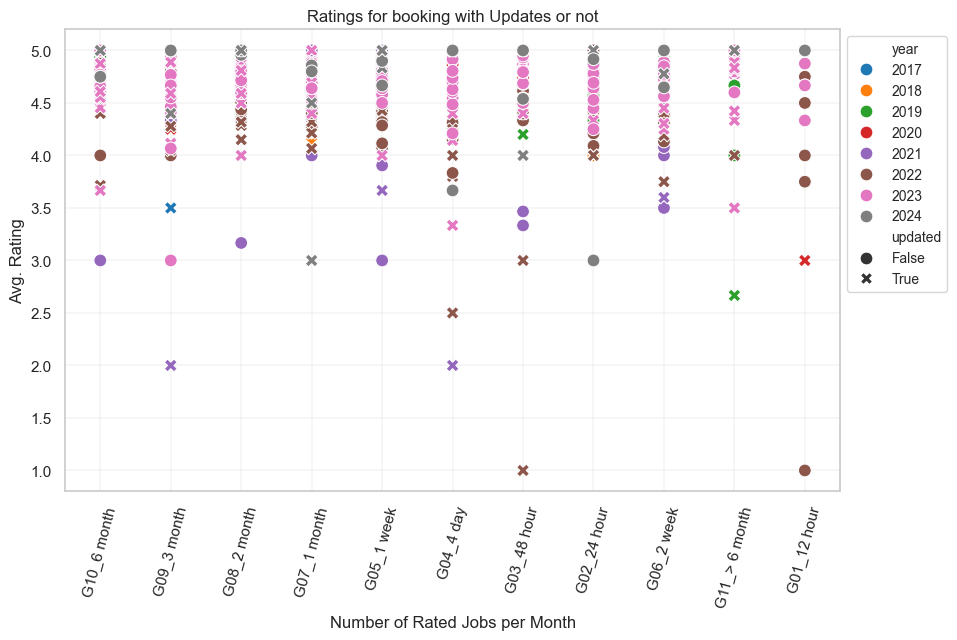

In [329]:
#I want to see the ratings in bookings with updates vs not and the impact of time in advance.


#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('M'),rb['pickup_date'].dt.to_period('Y'), rb['day_in_advance_groups'], rb['has_been_updated']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['month','year', 'advance','updated'], inplace=True)
#g1=g1.reset_index()
#g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
g1.sort_values(by='month', inplace=True)
g1.reset_index(inplace=True)
g1=g1[g1['month'].isin(g1[g1['updated']==True]['month'])]


#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='advance',y='mean', hue='year', style='updated',palette=sns.color_palette("tab10", n_colors=12),s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
#ax.set_ylim(ymin=4.25 ,ymax=5.1)
#ax.set(yticks=np.arange(3.80, 5.1, .1))
#ax.set(xticks=np.arange(0, 850, 50))
plt.title('Ratings for booking with Updates or not')
ax.set(xlabel="Number of Rated Jobs per Month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
plt.xticks(rotation=75)
#plt.legend(loc='lower right')

count
1      7
4      5
11     5
3      5
10     4
6      4
2      4
18     3
5      3
40     3
23     3
22     3
36     3
7      3
9      3
44     3
28     2
13     2
74     2
42     2
29     2
30     2
19     2
71     2
27     2
56     2
93     2
16     2
8      2
209    2
232    2
38     2
15     2
34     2
295    2
43     2
179    2
266    1
256    1
41     1
115    1
33     1
395    1
233    1
652    1
130    1
662    1
607    1
325    1
958    1
128    1
124    1
411    1
129    1
14     1
45     1
139    1
63     1
262    1
145    1
238    1
64     1
255    1
84     1
17     1
94     1
87     1
268    1
207    1
96     1
21     1
37     1
188    1
12     1
106    1
20     1
100    1
378    1
32     1
51     1
275    1
290    1
72     1
237    1
103    1
177    1
58     1
158    1
223    1
156    1
719    1
610    1
503    1
519    1
24     1
186    1
178    1
195    1
477    1
264    1
48     1
Name: count, dtype: int64

/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/3660726697.py:26: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  ax=sns.scatterplot(data=g1, x='advance',y='mean', hue='year', size='count', sizes=(4,2700), alpha=0.8, style='updated',palette=sns.color_palette("tab10", n_colors=12),s=85)


(4.0, 5.1)

[[<matplotlib.axis.YTick at 0x131f68250>,

Text(0.5, 1.0, 'Ratings for booking with Updates or not')

[Text(0.5, 0, 'Number of Rated Jobs per Month'), Text(0, 0.5, 'Avg. Rating')]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'G01_12 hour'),
  Text(1, 0, 'G02_24 hour'),
  Text(2, 0, 'G03_48 hour'),
  Text(3, 0, 'G04_4 day'),
  Text(4, 0, 'G05_1 week'),
  Text(5, 0, 'G06_2 week'),
  Text(6, 0, 'G07_1 month'),
  Text(7, 0, 'G08_2 month'),
  Text(8, 0, 'G09_3 month'),
  Text(9, 0, 'G10_6 month'),
  Text(10, 0, 'G11_> 6 month')])

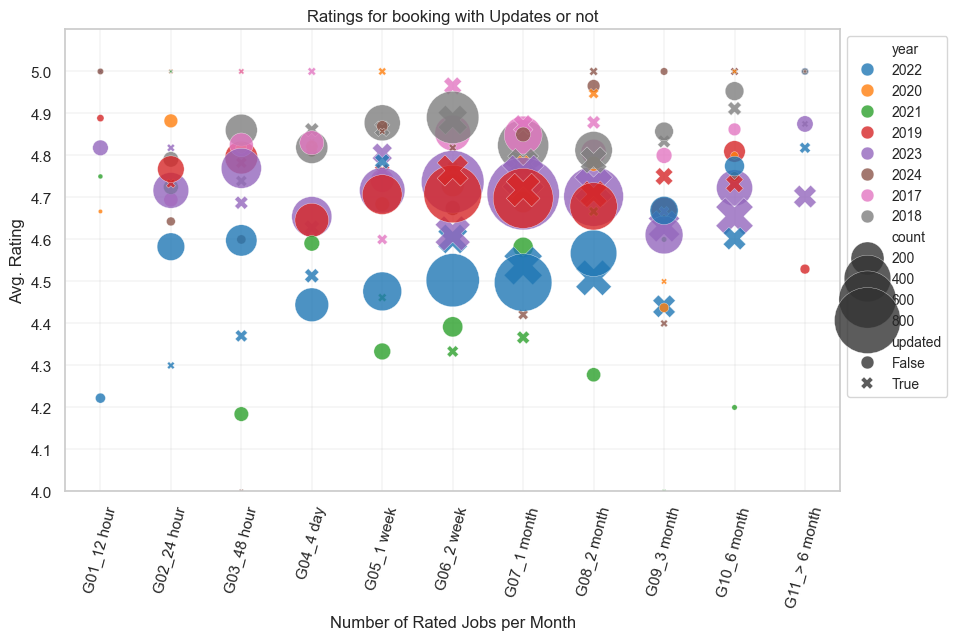

In [348]:
#I want to see the ratings in bookings with updates vs not and the impact of time in advance.


#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('Y'), rb['day_in_advance_groups'], rb['has_been_updated']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['year', 'advance','updated'], inplace=True)
#g1=g1.reset_index()
#g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
g1.sort_values(by='advance', inplace=True)
g1.reset_index(inplace=True)
#g1=g1[g1['count']>25]
g1=g1[g1['year'].isin(g1[g1['updated']==True]['year'])]
g1['count'].value_counts()


#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='advance',y='mean', hue='year', size='count', sizes=(4,2700), alpha=0.8, style='updated',palette=sns.color_palette("tab10", n_colors=12),s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4 ,ymax=5.1)
ax.set(yticks=np.arange(4, 5.1, .1))
#ax.set(xticks=np.arange(0, 850, 50))
plt.title('Ratings for booking with Updates or not')
ax.set(xlabel="Number of Rated Jobs per Month", ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
plt.xticks(rotation=75)
#plt.legend(loc='lower right')

#ax=sns.relplot(data=g3, x="month", y="ratio", hue="year", size="count_y",
#            sizes=(4, 2700), alpha=.3, palette="muted", height=height, aspect=(width/height))


count
1050    1
233     1
2024    1
639     1
2740    1
747     1
107     1
376     1
371     1
104     1
2564    1
985     1
4122    1
1501    1
215     1
78      1
Name: count, dtype: int64

,year,updated,count,mean,sum,min,max,std
3,2017,False,1050,4.824762,5066,1,5,0.582356
4,2017,True,233,4.875536,1136,1,5,0.530901
5,2018,False,2024,4.853261,9823,1,5,0.562205
6,2018,True,639,4.827856,3085,1,5,0.627310
7,2019,False,2740,4.706204,12895,1,5,0.732716
8,2019,True,747,4.729585,3533,1,5,0.733511
9,2020,True,107,4.831776,517,1,5,0.574390
10,2020,False,376,4.726064,1777,1,5,0.694329
11,2021,False,371,4.452830,1652,1,5,1.143636
12,2021,True,104,4.403846,458,1,5,1.210947


/var/folders/md/9_b_6n6s0jj4pbk1s4kdtxj00000gn/T/ipykernel_1096/3900461413.py:27: UserWarning: The palette list has more values (12) than needed (8), which may not be intended.
  ax=sns.scatterplot(data=g1, x='year', y='mean', hue='year', size='count', sizes=(4,4000), alpha=0.8, style='updated',palette=sns.color_palette("tab10", n_colors=12),s=85)


(4.0, 5.1)

[[<matplotlib.axis.YTick at 0x13356bd10>,

Text(0.5, 1.0, 'Ratings for booking with Updates or not')

[Text(0, 0.5, 'Avg. Rating')]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2017'),
  Text(1, 0, '2018'),
  Text(2, 0, '2019'),
  Text(3, 0, '2020'),
  Text(4, 0, '2021'),
  Text(5, 0, '2022'),
  Text(6, 0, '2023'),
  Text(7, 0, '2024')])

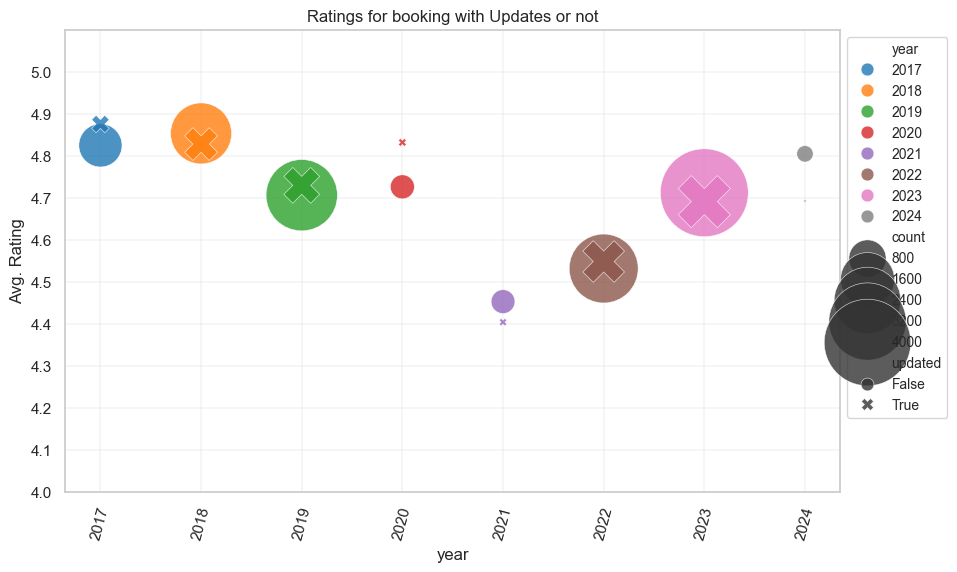

In [359]:
#I want to see the ratings in bookings with updates vs not and the impact of time in advance.


#DATA
group = rb.groupby([rb['pickup_date'].dt.to_period('Y'), rb['has_been_updated']])
g1=group.agg({'rating_score':['count', 'mean','sum', 'min', 'max', 'std']})
g1.columns=g1.columns.droplevel(0)
g1.index.rename(['year', 'updated'], inplace=True)
#g1=g1.reset_index()
#g1=g1.sort_values(by=['count'], ascending=False)
#g1=g1.reset_index()
#g1.drop('index', axis=1, inplace=True)
#g1=g1[g1['count']>=10]
g1.sort_values(by='year', inplace=True)
g1.reset_index(inplace=True)
#g1=g1[g1['count']>25]
g1=g1[g1['year'].isin(g1[g1['updated']==True]['year'])]
g1['count'].value_counts()
g1['year']=g1['year'].astype(str)
g1

#VISUALIZATION
width = 10
height = 6
sns.set(rc = {'figure.figsize':(width, height)})
sns.set_theme(style='whitegrid')
ax=sns.scatterplot(data=g1, x='year', y='mean', hue='year', size='count', sizes=(4,4000), alpha=0.8, style='updated',palette=sns.color_palette("tab10", n_colors=12),s=85)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid(linewidth=0.25)
ax.set_ylim(ymin=4 ,ymax=5.1)
ax.set(yticks=np.arange(4, 5.1, .1))
#ax.set(xticks=np.arange(2014, 2025, 1))
plt.title('Ratings for booking with Updates or not')
ax.set(ylabel='Avg. Rating')
plt.setp(ax.patches, linewidth=1.5 )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),fontsize=10)
plt.xticks(rotation=75)
#plt.legend(loc='lower right')

#ax=sns.relplot(data=g3, x="month", y="ratio", hue="year", size="count_y",
#            sizes=(4, 2700), alpha=.3, palette="muted", height=height, aspect=(width/height))
